# Testing package `Whirl2d`

In [24]:
include(joinpath(Pkg.dir("whirl2d"), "src/Whirl2d.jl"))
import Whirl2d
import Whirl2d:@get
using PyPlot
@get Whirl2d (Systems, Grids, DualPatch, Bodies, TimeMarching, NavierStokes);

### Create a body

In [25]:
Npts = 20
rad = 0.5
b = Bodies.Circle(Npts,rad)

Body: number of points = 20, reference point = (0.0,0.0), rotation matrix = [1.0 -0.0; 0.0 1.0]


### Create a domain with this body in it

In [26]:
xmin = [-1.0,-1.0]
xmax = [1.0,1.0]
dom = Systems.DualDomain(xmin,xmax)
dom = Systems.add_body(dom,b)

Domain: xmin = [-1.0, -1.0], xmax = [1.0, 1.0]
number of bodies = 1
Body: number of points = 20, reference point = (0.0,0.0), rotation matrix = [1.0 -0.0; 0.0 1.0]

Grid: number of cells = (0,0), Δx = 0.0, xmin = [0.0, 0.0], xmax = [0.0, 0.0]



#### Add a filling dual grid to this domain
The boundaries of the domain coincide with the boundaries of the dual grid

In [27]:
Δx = 0.01
dom = Systems.add_grid(dom,Δx)

Domain: xmin = [-1.0, -1.0], xmax = [1.0, 1.0]
number of bodies = 1
Body: number of points = 20, reference point = (0.0,0.0), rotation matrix = [1.0 -0.0; 0.0 1.0]

Grid: number of cells = (200,200), Δx = 0.01, xmin = [-1.0, -1.0], xmax = [1.0, 1.0]



### Compute the grid and body operators
This fills in the LGF and integrating factor tables, computes the interpolation/regularization operators, computes the Schur complement operators and factorizes them, and defines the operators needed for calling the HERK

In [28]:
α = 0.25
@time A⁻¹,B₁ᵀ,B₂,S⁻¹,S₀⁻¹,r₁,r₂ = NavierStokes.set_operators!(dom,α);

  4.540358 seconds (13.18 M allocations: 1.933 GiB, 5.49% gc time)


### Create an initial solution structure

In [29]:
s = NavierStokes.BodySoln(dom)

Solution: t = 0.0


Plot the C<sup>T</sup> E<sub>y</sub><sup>T</sup> operator

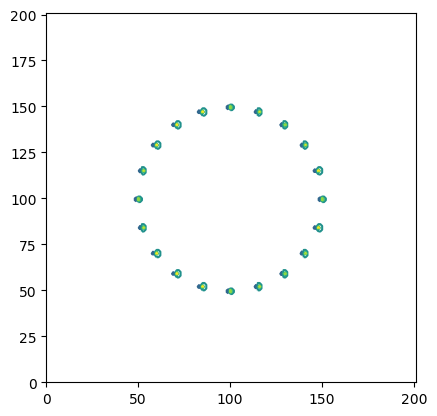

(0.0, 201.0, 0.0, 201.0)

In [190]:
contour(reshape(dom.ECᵀ[1]*ones(dom.nbodypts),size(dom.grid.cell)))
axis("scaled")

In [15]:
# Create a "grid unit vector": a bunch of cell data with zeros everywhere except at one point.
# This is useful for visualizing the LGF and the integrating factor
wunit = zeros(dom.grid.cell);
wunit[40,40] = 1.0;

In [192]:
# This is the discrete convolution of the integrating factor with the grid unit vector
# The result is just the integrating factor field, but shifted to the center specified
# in the grid unit vector.
@time s = Grids.Q(dom.grid,wunit);

  0.037541 seconds (264.80 k allocations: 14.863 MiB, 13.88% gc time)


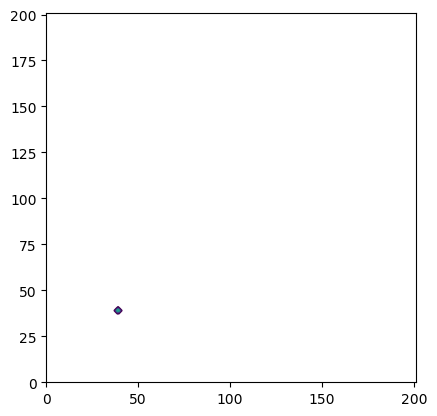

(0.0, 201.0, 0.0, 201.0)

In [193]:
# plot this
contour(s,linspace(0.01,1,31))
axis("scaled")

In [194]:
# This is the discrete convolution of the LGF with the grid unit vector
@time s = Grids.L⁻¹(dom.grid,wunit);

  0.022773 seconds (245.24 k allocations: 13.999 MiB)


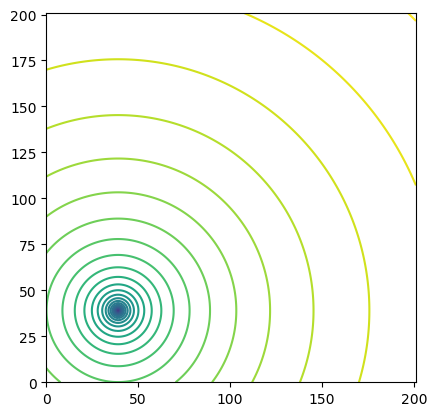

(0.0, 201.0, 0.0, 201.0)

In [195]:
# plot this
contour(s,31)
axis("scaled")